In [4]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

# from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
# from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
# import nilmtk.utils
# import nilmtk

In [5]:
####导出后到readDat.ipynb中读取####以上为平滑结束
###以下为聚类方法适合分两类的（中间状态可忽略的[实际是三类]）

In [20]:
import numpy as np
test=np.load('../../data/house_51/ElectricOven_appliance.npy', encoding = "latin1",allow_pickle=True) #加载文件
print(test)

[[1.40405903e+09 0.00000000e+00]
 [1.40405904e+09 0.00000000e+00]
 [1.40405905e+09 0.00000000e+00]
 ...
 [1.41271569e+09 0.00000000e+00]
 [1.41271570e+09 0.00000000e+00]
 [1.41271571e+09 0.00000000e+00]]


In [21]:
train_df1 = pd.DataFrame(test)
train_df1[0]=train_df1[0].astype(int)
train_df1

,0,1
0,1404059030,0.0
1,1404059040,0.0
2,1404059050,0.0
3,1404059060,0.0
4,1404059070,0.0
...,...,...
850926,1412715670,0.0
850927,1412715680,0.0
850928,1412715690,0.0
850929,1412715700,0.0


In [22]:
train_df1.columns=['time','smooth']
train_df1

,time,smooth
0,1404059030,0.0
1,1404059040,0.0
2,1404059050,0.0
3,1404059060,0.0
4,1404059070,0.0
...,...,...
850926,1412715670,0.0
850927,1412715680,0.0
850928,1412715690,0.0
850929,1412715700,0.0


In [23]:
train_df2 = train_df1
train_df2 = train_df2.set_index(train_df1["time"],drop=True)
train_df2 = train_df2.drop(["time"],axis=1)
train_df2

,smooth
time,
1404059030,0.0
1404059040,0.0
1404059050,0.0
1404059060,0.0
1404059070,0.0
...,...
1412715670,0.0
1412715680,0.0
1412715690,0.0


<AxesSubplot:xlabel='time'>

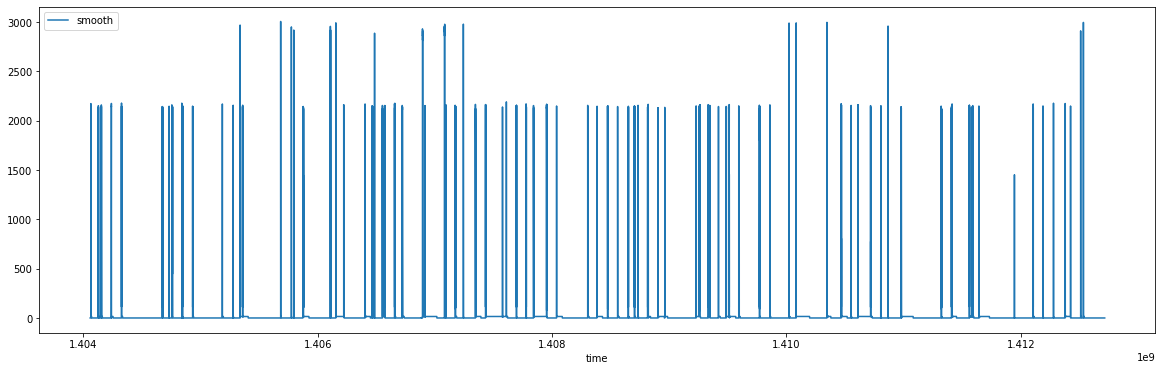

In [24]:
train_df2.plot(figsize=(20,6))

<AxesSubplot:xlabel='time'>

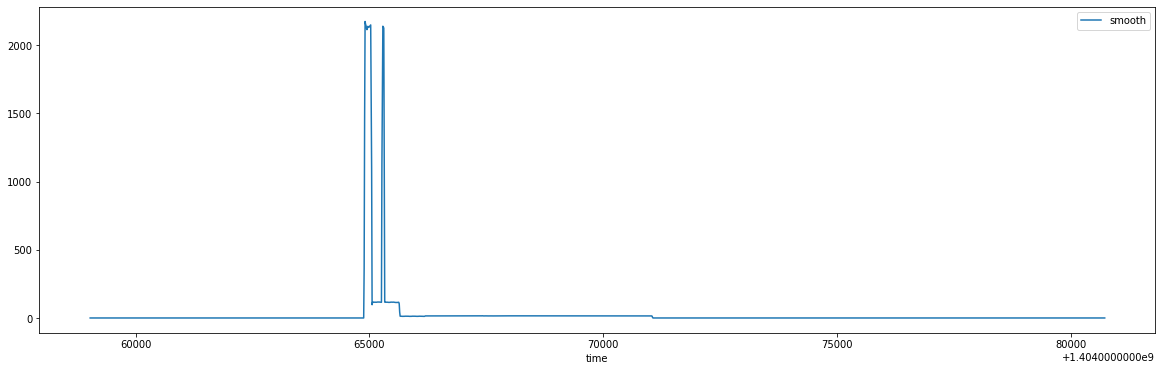

In [28]:
test2 = train_df2.iloc[0:2136,:1]
test2.plot(figsize=(20,6))

In [35]:
train_df1['Voltage']=110.0#添加电压用于聚类
train_fridge_df2=train_df1
train_fridge_df2=train_df1.reset_index()#为防止时间序列乱序，后期用于排序
train_fridge_df2['sy']=train_df1.index.values#为防止时间序列乱序，后期用于排序
train_fridge_df2

,index,time,smooth,Voltage,sy
0,0,1404059030,0.0,110.0,0
1,1,1404059040,0.0,110.0,1
2,2,1404059050,0.0,110.0,2
3,3,1404059060,0.0,110.0,3
4,4,1404059070,0.0,110.0,4
...,...,...,...,...,...
850926,850926,1412715670,0.0,110.0,850926
850927,850927,1412715680,0.0,110.0,850927
850928,850928,1412715690,0.0,110.0,850928
850929,850929,1412715700,0.0,110.0,850929


In [36]:
train_fridge_df3 = train_fridge_df2.iloc[2045:2136,2:5]
train_fridge_df3

,smooth,Voltage,sy
2045,0.0,110.0,2045
2046,0.0,110.0,2046
2047,0.0,110.0,2047
2048,0.0,110.0,2048
2049,0.0,110.0,2049
...,...,...,...
2131,0.0,110.0,2131
2132,0.0,110.0,2132
2133,0.0,110.0,2133
2134,0.0,110.0,2134


In [37]:
#对电压及平滑后的数据进行聚类
X=train_fridge_df3.iloc[:,[0,1]].values
from sklearn.cluster import KMeans#导入聚类模型
cost = []#初始化损失（距离）值
for i in range(1,11):#尝试不同的K值
    kmeans = KMeans(n_clusters= i ,init='k-means++', random_state = 0)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)#inerita_是我们选择的方法，其作用相当于损失函数
    print('123')

123
123
123


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  import sys
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  import sys
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  import sys
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  import sys


123
123


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  import sys
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  import sys


123
123


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  import sys
/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  import sys


123
123
123


/environment/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  import sys


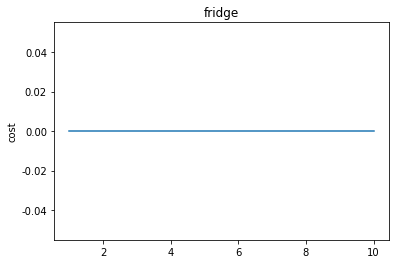

In [38]:
#绘制手肘图找到最佳K值
import matplotlib.pyplot as plt
import seaborn as sns
hist,ax = plt.subplots()
plt.plot(range(1,11),cost)
# plt.title('The Elbow Method')
ax.set_title('fridge')
ax.set_ylabel('cost')
plt.show()

In [34]:
#由手肘图判断最佳K值大概是x，选择3作为聚类个数
kmeansmodel = KMeans(n_clusters=3, init='k-means++')##3->k 通过上述拐点来取
y_kmeans = kmeansmodel.fit_predict(X)
kmeansmodel.cluster_centers_#3个聚类中心

/environment/miniconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1258: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


array([[  0., 110.],
       [  0., 110.],
       [  0., 110.]])

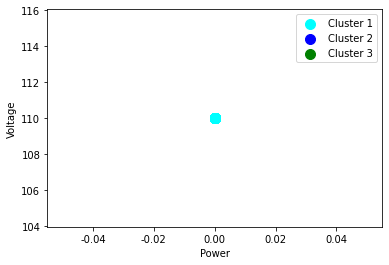

In [39]:
#把分类好的聚类可视化（虽然我感觉没什么用，分不太准
hist,ax = plt.subplots()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s = 100, c = 'cyan', label = 'Cluster 1')#聚类1
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s = 100, c = 'blue', label = 'Cluster 2')#聚类2
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s = 100, c = 'green', label = 'Cluster 3')#聚类3
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'yellow', label = 'Centroids')#质心
ax.set_xlabel('Power')#能耗
ax.set_ylabel('Voltage')#电压
plt.legend()
plt.show()

In [40]:
#数组切割方法
fdf1=train_fridge_df3.loc[(train_fridge_df3['smooth']>=0) & (train_fridge_df3['smooth']<150)]
fdf2=train_fridge_df3.loc[(train_fridge_df3['smooth']>=150)& (train_fridge_df3['smooth']<3000)]
#fdf3=train_fridge_df3.loc[(train_fridge_df3['smooth']>=900)]

In [41]:
##标记状态
fdf1['status']=0
fdf2['status']=1
#fdf3['status']=2

In [43]:
#切割后重新拼接排序
train_total=pd.concat([fdf1,fdf2])
train_total.sort_values(by='sy', inplace=True, ascending=True)

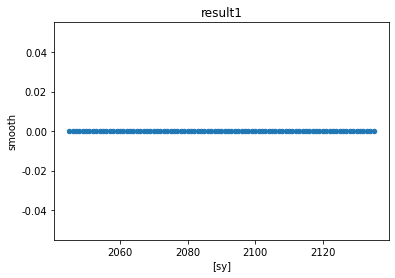

In [44]:
##聚类前的图像
train_total.plot.scatter(['sy'],('smooth'),colormap='jet')
#train_total.plot.scatter(['sy'],['smooth'],colormap='jet')
plt.title('result1')
plt.show()

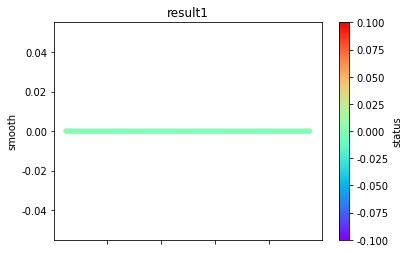

<Figure size 1152x576 with 0 Axes>

In [45]:
###聚类后的图像
import matplotlib.pyplot as plt
train_total.plot.scatter(['sy'],('smooth'),c='status',cmap='rainbow')
#train_total.plot.scatter(['sy'],['smooth'],c='status',colormap='jet')
plt.title('result1')
plt.figure(figsize=(16,8))
plt.show()

In [175]:
#去掉多余的辅助数据
#train_total.index=train_df1.index
#train_total.drop(['index','Voltage'],axis=1,inplace=True)
#train_total['time']=train_total.index
#train_total['time'] = pd.to_numeric(train_total['time'])